In [1]:
import requests
import pandas as pd
import folium
import matplotlib.pyplot as plt

### Get previous dataframe and initialize some variables

In [2]:
df1 = pd.read_csv('second_step.csv')
latitude, longitude = [], []
rows = df1.values
rows[:2]

array([['M3A', 'North York', 'Parkwoods', 43.7532586, -79.3296565],
       ['M4A', 'North York', 'Victoria Village', 43.72588229999999,
        -79.31557159999998]], dtype=object)

### Request venues for each postal code

In [3]:
CLIENT_ID = 'SWJNFLEKOK3UCLSJRIY305D2G5NAIZULALAVQVD5VSNCT0ZQ' 
CLIENT_SECRET = 'HXGRQS23RUXCNZWNS2Z0ZJUFQDHYC5EGBZTH0IMKVOPYKVGV' 
VERSION = '20180605' 

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(df1['Neighbourhood'], df1['Latitude'], df1['Longitude']):
        print('Requesting {}...'.format(name))
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d110941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        req_json =  requests.get(url).json()
        if req_json['meta']['code'] == 200:
            
            results = req_json["response"]['groups'][0]['items']            
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            if len(nearby_venues) > 0:
                nearby_venues.columns = ['Neighborhood', 
                          'Neighborhood Latitude', 
                          'Neighborhood Longitude', 
                          'Venue', 
                          'Venue Latitude', 
                          'Venue Longitude', 
                          'Venue Category']

    return(nearby_venues)

In [5]:
LIMIT = 100
radius=500
Toronto_venues = getNearbyVenues(names=df1['Neighbourhood'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude'])
             

Requesting Parkwoods...
Requesting Victoria Village...
Requesting Harbourfront, Regent Park...
Requesting Lawrence Heights, Lawrence Manor...
Requesting Queen's Park...
Requesting Islington Avenue...
Requesting Rouge, Malvern...
Requesting Don Mills North...
Requesting Woodbine Gardens, Parkview Hill...
Requesting Ryerson, Garden District...
Requesting Glencairn...
Requesting Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park...
Requesting Highland Creek, Rouge Hill, Port Union...
Requesting Flemingdon Park, Don Mills South...
Requesting Woodbine Heights...
Requesting St. James Town...
Requesting Humewood-Cedarvale...
Requesting Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe...
Requesting Guildwood, Morningside, West Hill...
Requesting The Beaches...
Requesting Berczy Park...
Requesting Caledonia-Fairbanks...
Requesting Woburn...
Requesting Leaside...
Requesting Central Bay Street...
Requesting Christie...
Requesting Cedarbrae...
Requesting Hillcrest 

In [6]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.654260,-79.360636,Archeo,43.650667,-79.359431,Italian Restaurant
1,"Harbourfront, Regent Park",43.654260,-79.360636,Caffe Furbo,43.649970,-79.358849,Café
2,"Harbourfront, Regent Park",43.654260,-79.360636,Basso,43.655532,-79.365071,Italian Restaurant
3,"Ryerson, Garden District",43.657162,-79.378937,Trattoria Mercatto,43.654453,-79.380974,Italian Restaurant
4,"Ryerson, Garden District",43.657162,-79.378937,Scaddabush Italian Kitchen & Bar,43.658920,-79.382891,Italian Restaurant


### Encode the venue label with One Hot Encoding technique

In [7]:
Toronto_kv = pd.get_dummies(Toronto_venues[['Venue']], prefix="", prefix_sep="")
Toronto_kv['Neighborhood'] = Toronto_venues['Neighborhood'] 
Toronto_kv.head()

,7 Numbers,7 West Cafe,Adega Restaurant,Alio Restaurant & Wine Bar,Amano Pasta,Amato Pizza,Amico's Pizza,Archeo,Aria Ristorante,Aroma Espresso Bar,...,Uno Mustachio,Vagabondo Ristorante & Lounge,Vesuvio's Pizzeria & Spaghetti House,Vinnie's Pizza & Pasta,Vinny’s Panini,Viva Napoli,Zero Zero,Zucca Trattoria,il gatto nero,Neighborhood
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"Harbourfront, Regent Park"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Harbourfront, Regent Park"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Harbourfront, Regent Park"
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Ryerson, Garden District"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Ryerson, Garden District"


### Grouping by Neighborhood and mean of frequency of ocurrance of each venue

In [8]:
Toronto_mean = Toronto_kv.groupby('Neighborhood').mean()
Toronto_mean.head()

,7 Numbers,7 West Cafe,Adega Restaurant,Alio Restaurant & Wine Bar,Amano Pasta,Amato Pizza,Amico's Pizza,Archeo,Aria Ristorante,Aroma Espresso Bar,...,Uncle Tony's Pizza and Pasta,Uno Mustachio,Vagabondo Ristorante & Lounge,Vesuvio's Pizzeria & Spaghetti House,Vinnie's Pizza & Pasta,Vinny’s Panini,Viva Napoli,Zero Zero,Zucca Trattoria,il gatto nero
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.066667,0.0,0.0
"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.041667,0.0,0.041667,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
"Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Scaling data using the the Standardize features : StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
training_set = pd.DataFrame(scaler.fit_transform(Toronto_mean))
training_set.columns = Toronto_mean.columns
training_set.index = Toronto_mean.index
training_set.head(1)

,7 Numbers,7 West Cafe,Adega Restaurant,Alio Restaurant & Wine Bar,Amano Pasta,Amato Pizza,Amico's Pizza,Archeo,Aria Ristorante,Aroma Espresso Bar,...,Uncle Tony's Pizza and Pasta,Uno Mustachio,Vagabondo Ristorante & Lounge,Vesuvio's Pizzeria & Spaghetti House,Vinnie's Pizza & Pasta,Vinny’s Panini,Viva Napoli,Zero Zero,Zucca Trattoria,il gatto nero
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Adelaide, King, Richmond",-0.227939,-0.160128,-0.325037,-0.325037,-0.239878,-0.224733,-0.160128,-0.160128,-0.186613,2.381304,...,-0.327853,-0.160128,-0.327853,-0.333333,-0.325037,-0.160128,-0.160128,4.481631,-0.160128,-0.229416


## Venues Segmentation with K-Means

In [11]:
from sklearn.cluster import KMeans
import numpy as np

### Build the model

In [12]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0)

### Train the model

In [13]:
kmeans.fit(training_set)

kmeans.labels_

array([1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2], dtype=int32)

In [14]:
# add clustering labels
Toronto_mean['Cluster Labels'] = kmeans.labels_

Toronto_mean.head(2)

,7 Numbers,7 West Cafe,Adega Restaurant,Alio Restaurant & Wine Bar,Amano Pasta,Amato Pizza,Amico's Pizza,Archeo,Aria Ristorante,Aroma Espresso Bar,...,Uno Mustachio,Vagabondo Ristorante & Lounge,Vesuvio's Pizzeria & Spaghetti House,Vinnie's Pizza & Pasta,Vinny’s Panini,Viva Napoli,Zero Zero,Zucca Trattoria,il gatto nero,Cluster Labels
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,1
"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2


In [15]:
clusters = []
for row in Toronto_venues.values:
    values = Toronto_mean.loc[row[0]].tolist()
    clusters.append(values[(len(values) - 1)])
    
Toronto_venues['Cluster'] = clusters
Toronto_venues['Cluster'] = Toronto_venues['Cluster'].astype(int)
Toronto_venues.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster
0,"Harbourfront, Regent Park",43.654260,-79.360636,Archeo,43.650667,-79.359431,Italian Restaurant,2
1,"Harbourfront, Regent Park",43.654260,-79.360636,Caffe Furbo,43.649970,-79.358849,Café,2
2,"Harbourfront, Regent Park",43.654260,-79.360636,Basso,43.655532,-79.365071,Italian Restaurant,2
3,"Ryerson, Garden District",43.657162,-79.378937,Trattoria Mercatto,43.654453,-79.380974,Italian Restaurant,2
4,"Ryerson, Garden District",43.657162,-79.378937,Scaddabush Italian Kitchen & Bar,43.658920,-79.382891,Italian Restaurant,2


### Repartition of clustered data

(-1.25, 1.25, -1.25, 1.25)

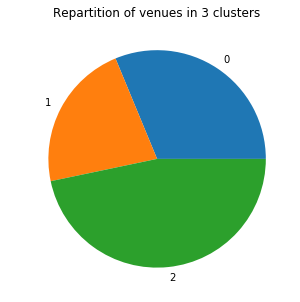

In [16]:
Toronto_venues.groupby("Cluster") \
    .count()['Neighborhood'] \
    .plot(kind="pie", figsize=(20,5), legend=False, 
          title="Repartition of venues in 3 clusters")
plt.axis('off')

### Visualisation of clustered data

In [17]:
m = folium.Map(
    location=[43.653226, -79.3831843],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for row in Toronto_venues.values:
    row_type, latitude, longitude, cluster = row[0], row[4], row[5], row[7]
    color = ['red', 'blue', 'black', 'yellow', 'purple', "black"][int(cluster)]
    folium.CircleMarker(
        location=[latitude, longitude],
        popup=row_type,
        radius=5,
        color= color,
        fill=True,
    ).add_to(m)

m

In [18]:
Toronto_venues.loc[Toronto_venues['Cluster'] == 0]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster
14,St. James Town,43.651692,-79.377925,Terroni,43.650927,-79.375602,Italian Restaurant,0
15,St. James Town,43.651692,-79.377925,La Bettola Di Terroni,43.651993,-79.378056,Italian Restaurant,0
16,St. James Town,43.651692,-79.377925,Sud Forno,43.650940,-79.379045,Italian Restaurant,0
17,St. James Town,43.651692,-79.377925,Carisma,43.649617,-79.375434,Italian Restaurant,0
18,St. James Town,43.651692,-79.377925,Mirto,43.650702,-79.376307,Italian Restaurant,0
19,St. James Town,43.651692,-79.377925,Trattoria Mercatto,43.654453,-79.380974,Italian Restaurant,0
20,St. James Town,43.651692,-79.377925,Mercatto,43.650243,-79.380820,Italian Restaurant,0
21,St. James Town,43.651692,-79.377925,Metropolitan Resto Bar,43.650062,-79.377181,Italian Restaurant,0
22,St. James Town,43.651692,-79.377925,Mercatto,43.650256,-79.375926,Italian Restaurant,0
23,St. James Town,43.651692,-79.377925,Vagabondo Ristorante & Lounge,43.648222,-79.375300,Italian Restaurant,0
